In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [3]:
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv= 10, scoring='accuracy')
        cv_scores.append(scores.mean())
    return cv_scores

In [4]:
features.shape

(1797, 64)

In [5]:
features[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)

In [7]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

<Axes: >

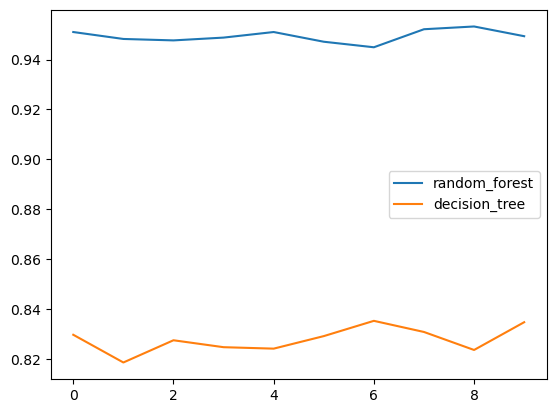

In [8]:
cv_list = [
    ['random_forest', rf_cv_scores],
    ['decision_tree', dt_cv_scores]
]
cv_dict = dict(cv_list)
df = pd.DataFrame.from_dict(cv_dict)
df.plot()

In [9]:
np.mean(dt_cv_scores)

0.8278047796399752

In [10]:
np.mean(rf_cv_scores)

0.9493528864059589

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=8, max_features=32, random_state=35)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

print('[accuracy]')
print('d-tree', accuracy_score(y_test, dtree_predicted))
print('knn', accuracy_score(y_test, knn_predicted))
print('svm', accuracy_score(y_test, svm_predicted))

[accuracy]
d-tree 0.8305555555555556
knn 0.8472222222222222
svm 0.9055555555555556


In [16]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[:2])

[[2.28371626e-03 2.60884779e-03 7.34828299e-03 1.13220530e-02
  2.98384806e-03 1.54474301e-02 1.92289616e-03 5.77805138e-03
  2.90954736e-02 9.21209401e-01]
 [1.55791113e-04 5.61244252e-05 9.99449639e-01 2.36295536e-05
  2.80680766e-05 5.86502956e-05 4.63685740e-05 5.00159432e-05
  5.16823970e-05 8.00304751e-05]]


In [17]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9111111111111111

In [18]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9083333333333333

([<matplotlib.axis.XTick at 0x1c727f29490>,
 [Text(0, 0, 'decision tree'),
  Text(1, 0, 'knn'),
  Text(2, 0, 'svm'),
  Text(3, 0, 'hard_voting'),
  Text(4, 0, 'soft_voting')])

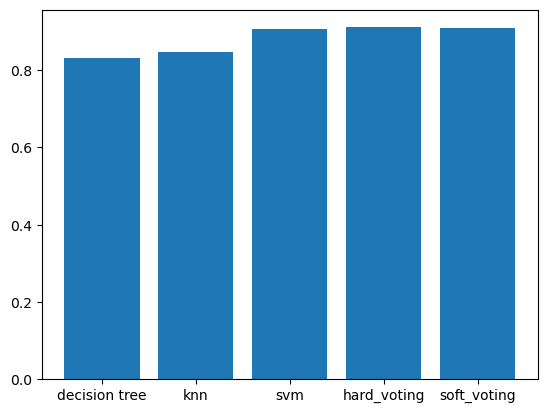

In [19]:
x = np.arange(5)
plt.bar(x, height=[accuracy_score(y_test, dtree_predicted),
                   accuracy_score(y_test, knn_predicted),
                   accuracy_score(y_test, svm_predicted),
                   accuracy_score(y_test, hard_voting_predicted),
                   accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree', 'knn', 'svm', 'hard_voting', 'soft_voting'])